In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
traindata=pd.read_csv("/content/dataset.csv")
traindata

<ipython-input-69-691b0356f00d>:1: DtypeWarning: Columns (510) have mixed types. Specify dtype option on import or set low_memory=False.
  traindata=pd.read_csv("/content/dataset.csv")


,Unnamed: 0,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,0,16,20,0,48,41472,257790,0,12,2,...,0.100425,174853276.0,11.431817,1263588.0,0.0,0.0,0.099783,1.593396e+09,ixnetwork-traffic-start,0.0
1,1,16,20,0,48,41472,257790,0,12,2,...,0.099506,174854074.0,13.313681,1263595.0,0.0,0.0,0.116705,1.593396e+09,ixnetwork-traffic-start,0.0
2,2,16,20,0,48,41472,257790,0,12,2,...,0.099506,174854758.0,13.313681,1263601.0,0.0,0.0,0.100463,1.593396e+09,ixnetwork-traffic-start,0.0
3,3,16,20,0,48,41472,257790,0,12,2,...,0.099826,174855556.0,13.277844,1263608.0,0.0,0.0,0.116223,1.593396e+09,ixnetwork-traffic-start,0.0
4,4,16,20,0,48,41472,257790,0,12,2,...,0.116494,174856338.0,13.277844,1263615.0,0.0,0.0,0.116614,1.593396e+09,ixnetwork-traffic-start,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,9665,16,20,0,48,41472,257790,0,12,2,...,0.100107,243309818.0,11.436646,1381634.0,0.0,0.0,0.100265,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9799,9666,16,20,0,48,41472,257790,0,12,2,...,0.116461,243310502.0,11.345642,1381640.0,0.0,0.0,0.100331,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9800,9667,16,20,0,48,41472,257790,0,12,2,...,0.099810,243311186.0,11.412337,1381646.0,0.0,0.0,0.099995,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9801,9668,16,20,0,48,41472,257790,0,12,2,...,0.100395,243311984.0,13.306911,1381653.0,0.0,0.0,0.116647,1.593977e+09,ixnetwork-bgp-hijacking-stop,12.0


##Feature Mapping

In [ ]:
traindata['v_type_code'].value_counts()

6.0     1813
5.0     1771
8.0     1751
7.0     1710
3.0      559
4.0      559
10.0     462
9.0      456
11.0     228
12.0     227
1.0      130
2.0      130
0.0        6
Name: v_type_code, dtype: int64

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Columns: 1000 entries, Unnamed: 0 to v_type_code
dtypes: float64(870), int64(128), object(2)
memory usage: 74.8+ MB


In [ ]:
traindata.describe()

,Unnamed: 0,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type_code
count,9803.000000,9803.0,9803.0,9803.0,9803.0,9803.0,9803.0,9803.0,9803.0,9803.0,...,9802.0,9802.000000,9.802000e+03,9802.000000,9.802000e+03,9802.0,9802.0,9802.000000,9.802000e+03,9802.000000
mean,4852.619096,16.0,20.0,0.0,48.0,41472.0,257790.0,0.0,12.0,2.0,...,0.0,0.217332,2.260391e+08,116.902278,1.336909e+06,0.0,0.0,0.201738,1.593687e+09,6.526219
std,2776.934080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.847353,1.134321e+07,6445.956178,2.672920e+04,0.0,0.0,5.336858,1.670495e+05,2.165289
min,0.000000,16.0,20.0,0.0,48.0,41472.0,257790.0,0.0,12.0,2.0,...,0.0,0.000000,1.748533e+08,0.000000,1.263588e+06,0.0,0.0,0.000000,1.593396e+09,0.000000
25%,2450.500000,16.0,20.0,0.0,48.0,41472.0,257790.0,0.0,12.0,2.0,...,0.0,0.100023,2.189280e+08,11.405910,1.315798e+06,0.0,0.0,0.100067,1.593543e+09,5.000000
50%,4901.000000,16.0,20.0,0.0,48.0,41472.0,257790.0,0.0,12.0,2.0,...,0.0,0.116322,2.240536e+08,13.029797,1.335499e+06,0.0,0.0,0.116350,1.593690e+09,6.000000
75%,7218.500000,16.0,20.0,0.0,48.0,41472.0,257790.0,0.0,12.0,2.0,...,0.0,0.117042,2.342590e+08,13.832755,1.358840e+06,0.0,0.0,0.117078,1.593830e+09,8.000000
max,9669.000000,16.0,20.0,0.0,48.0,41472.0,257790.0,0.0,12.0,2.0,...,0.0,263.411598,2.433127e+08,603405.146954,1.381659e+06,0.0,0.0,501.955933,1.593977e+09,12.000000


##Missing Values

In [ ]:
traindata.isnull().sum()

Unnamed: 0                                                          0
p_/computes0/service/id                                             0
p_/computes0/vcpus_used                                             0
p_/computes0/local_gb_used                                          0
p_/computes0/vcpus                                                  0
                                                                   ..
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error    1
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate     1
v_/time                                                             1
v_type                                                              1
v_type_code                                                         1
Length: 1000, dtype: int64

In [ ]:
# drop unnamed column
traindata.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
traindata

,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,16,20,0,48,41472,257790,0,12,2,2,...,0.100425,174853276.0,11.431817,1263588.0,0.0,0.0,0.099783,1.593396e+09,ixnetwork-traffic-start,0.0
1,16,20,0,48,41472,257790,0,12,2,2,...,0.099506,174854074.0,13.313681,1263595.0,0.0,0.0,0.116705,1.593396e+09,ixnetwork-traffic-start,0.0
2,16,20,0,48,41472,257790,0,12,2,2,...,0.099506,174854758.0,13.313681,1263601.0,0.0,0.0,0.100463,1.593396e+09,ixnetwork-traffic-start,0.0
3,16,20,0,48,41472,257790,0,12,2,2,...,0.099826,174855556.0,13.277844,1263608.0,0.0,0.0,0.116223,1.593396e+09,ixnetwork-traffic-start,0.0
4,16,20,0,48,41472,257790,0,12,2,2,...,0.116494,174856338.0,13.277844,1263615.0,0.0,0.0,0.116614,1.593396e+09,ixnetwork-traffic-start,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,16,20,0,48,41472,257790,0,12,2,2,...,0.100107,243309818.0,11.436646,1381634.0,0.0,0.0,0.100265,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9799,16,20,0,48,41472,257790,0,12,2,2,...,0.116461,243310502.0,11.345642,1381640.0,0.0,0.0,0.100331,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9800,16,20,0,48,41472,257790,0,12,2,2,...,0.099810,243311186.0,11.412337,1381646.0,0.0,0.0,0.099995,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9801,16,20,0,48,41472,257790,0,12,2,2,...,0.100395,243311984.0,13.306911,1381653.0,0.0,0.0,0.116647,1.593977e+09,ixnetwork-bgp-hijacking-stop,12.0


In [ ]:
data_drop_index = traindata[traindata['v_type_code']== 0].index.tolist()
traindata.drop(index=data_drop_index, axis=0, inplace=True)

In [ ]:
traindata

,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
6,16,20,0,48,41472,257790,0,12,2,2,...,0.116937,174858104.0,11.376162,1263630.0,0.0,0.0,0.100582,1.593396e+09,node-down,1.0
7,16,20,0,48,41472,257790,0,12,2,2,...,0.133494,174858788.0,18.022304,1263636.0,0.0,0.0,0.148887,1.593396e+09,node-down,1.0
8,16,20,0,48,41472,257790,0,12,2,2,...,0.099904,174859726.0,11.385854,1263643.0,0.0,0.0,0.116852,1.593396e+09,node-down,1.0
9,16,20,0,48,41472,257790,0,12,2,2,...,0.133406,174860670.0,15.640423,1263651.0,0.0,0.0,0.133262,1.593396e+09,node-down,1.0
10,16,20,0,48,41472,257790,0,12,2,2,...,0.116827,174861354.0,15.790395,1263657.0,0.0,0.0,0.099945,1.593396e+09,node-down,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,16,20,0,48,41472,257790,0,12,2,2,...,0.100107,243309818.0,11.436646,1381634.0,0.0,0.0,0.100265,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9799,16,20,0,48,41472,257790,0,12,2,2,...,0.116461,243310502.0,11.345642,1381640.0,0.0,0.0,0.100331,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9800,16,20,0,48,41472,257790,0,12,2,2,...,0.099810,243311186.0,11.412337,1381646.0,0.0,0.0,0.099995,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9801,16,20,0,48,41472,257790,0,12,2,2,...,0.100395,243311984.0,13.306911,1381653.0,0.0,0.0,0.116647,1.593977e+09,ixnetwork-bgp-hijacking-stop,12.0


In [ ]:
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 0 if x == 1 or x == 2 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 1 if x == 3 or x == 4 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 2 if x == 5 or x == 6 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 3 if x == 7 or x == 8 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 4 if x == 9 or x == 10 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 5 if x == 11 or x == 12 else x)

In [ ]:
traindata


,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
6,16,20,0,48,41472,257790,0,12,2,2,...,0.116937,174858104.0,11.376162,1263630.0,0.0,0.0,0.100582,1.593396e+09,node-down,0.0
7,16,20,0,48,41472,257790,0,12,2,2,...,0.133494,174858788.0,18.022304,1263636.0,0.0,0.0,0.148887,1.593396e+09,node-down,0.0
8,16,20,0,48,41472,257790,0,12,2,2,...,0.099904,174859726.0,11.385854,1263643.0,0.0,0.0,0.116852,1.593396e+09,node-down,0.0
9,16,20,0,48,41472,257790,0,12,2,2,...,0.133406,174860670.0,15.640423,1263651.0,0.0,0.0,0.133262,1.593396e+09,node-down,0.0
10,16,20,0,48,41472,257790,0,12,2,2,...,0.116827,174861354.0,15.790395,1263657.0,0.0,0.0,0.099945,1.593396e+09,node-down,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,16,20,0,48,41472,257790,0,12,2,2,...,0.100107,243309818.0,11.436646,1381634.0,0.0,0.0,0.100265,1.593977e+09,ixnetwork-bgp-hijacking-start,5.0
9799,16,20,0,48,41472,257790,0,12,2,2,...,0.116461,243310502.0,11.345642,1381640.0,0.0,0.0,0.100331,1.593977e+09,ixnetwork-bgp-hijacking-start,5.0
9800,16,20,0,48,41472,257790,0,12,2,2,...,0.099810,243311186.0,11.412337,1381646.0,0.0,0.0,0.099995,1.593977e+09,ixnetwork-bgp-hijacking-start,5.0
9801,16,20,0,48,41472,257790,0,12,2,2,...,0.100395,243311984.0,13.306911,1381653.0,0.0,0.0,0.116647,1.593977e+09,ixnetwork-bgp-hijacking-stop,5.0


In [ ]:
traindata['v_type_code'].value_counts()

2.0    3584
3.0    3461
1.0    1118
4.0     918
5.0     455
0.0     260
Name: v_type_code, dtype: int64

In [ ]:
traindata.isnull().sum()

p_/computes0/service/id                                             0
p_/computes0/vcpus_used                                             0
p_/computes0/local_gb_used                                          0
p_/computes0/vcpus                                                  0
p_/computes0/memory_mb_used                                         0
                                                                   ..
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error    1
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate     1
v_/time                                                             1
v_type                                                              1
v_type_code                                                         1
Length: 999, dtype: int64

In [ ]:
traindata= traindata.dropna(subset=['v_type_code'])

In [ ]:
traindata=traindata.drop(['v_type'], axis=1)

In [ ]:
traintarget=traindata['v_type_code']
traindata=traindata.drop(['v_type_code'], axis=1)

In [ ]:
traindata.isna().sum()

p_/computes0/service/id                                             0
p_/computes0/vcpus_used                                             0
p_/computes0/local_gb_used                                          0
p_/computes0/vcpus                                                  0
p_/computes0/memory_mb_used                                         0
                                                                   ..
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets          0
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop     0
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error    0
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate     0
v_/time                                                             0
Length: 997, dtype: int64

##Normalisation

In [ ]:
all_columns = traindata.columns.tolist()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
all_columns = traindata.columns.tolist()
scaler = MinMaxScaler()
traindata[all_columns] = scaler.fit_transform(traindata[all_columns])


In [ ]:
traindata

,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000444,0.000000,0.000019,0.000000,0.0,0.0,0.000200,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000507,0.000010,0.000030,0.000051,0.0,0.0,0.000297,0.000103
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000379,0.000024,0.000019,0.000110,0.0,0.0,0.000233,0.000206
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000506,0.000037,0.000026,0.000178,0.0,0.0,0.000265,0.000310
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000444,0.000047,0.000026,0.000229,0.0,0.0,0.000199,0.000413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000380,0.999958,0.000019,0.999788,0.0,0.0,0.000200,0.999587
9799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000442,0.999968,0.000019,0.999839,0.0,0.0,0.000200,0.999690
9800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000379,0.999978,0.000019,0.999890,0.0,0.0,0.000199,0.999794
9801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000381,0.999990,0.000022,0.999949,0.0,0.0,0.000232,0.999897


In [ ]:
len(traindata)

9796

#Feature selection

##CORRELATION

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

correlation_scores = {}
for feature in traindata.columns:
    correlation, _ = pearsonr(traindata[feature], traintarget)
    if(correlation>0):
      correlation_scores[feature]=abs(correlation)

correlation_scores

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


{'p_/computes0/disk_available_least': 0.04709777441554825,
 'p_/computes0/metrics/compute-node/compute-node-cpu-idle-time': 0.18043293489098777,
 'p_/computes0/metrics/compute-node/compute-node-cpu-iowait-time': 0.1828132736879531,
 'p_/computes0/metrics/compute-node/compute-node-cpu-kernel-percent': 0.18105520880504591,
 'p_/computes0/metrics/compute-node/compute-node-cpu-kernel-time': 0.18116339145677107,
 'p_/computes0/metrics/compute-node/compute-node-cpu-percent': 0.18078138382432987,
 'p_/computes0/metrics/compute-node/compute-node-cpu-user-percent': 0.15429793364470784,
 'p_/computes0/metrics/compute-node/compute-node-cpu-user-time': 0.18109146004463425,
 'p_/computes0/metrics/hardware/hardware-cpu-load-15min': 0.17517030614686224,
 'p_/computes0/metrics/hardware/hardware-cpu-load-1min': 0.06215774481451111,
 'p_/computes0/metrics/hardware/hardware-cpu-load-5min': 0.09869007392012895,
 'p_/computes0/metrics/hardware/hardware-cpu-util': 0.10731326525271187,
 'p_/computes0/metrics

In [ ]:
corr_scores = sorted(correlation_scores.items(), key=lambda x: x[1], reverse=True)

In [ ]:
corr_scores

[('n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw',
  0.5858709208816498),
 ('n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port',
  0.547783957241653),
 ('n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received',
  0.3175982901426842),
 ('n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives',
  0.3169435608798745),
 ('n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives',
  0.3162264039895588),
 ('v_/devices#TR-01/metrics/memory-resident', 0.2860215736734948),
 ('v_/ports#link-intgw-exgw-a-1-x/metrics/network-outgoing-bytes-rate',
  0.2595876018406779),
 ('v_/ports#link-intgw-exgw-a-1-x/metrics/network-outgoing-packets-rate',
  0.2589619668810482),
 ('p_/comp

In [ ]:
fsop1=[]
for i in corr_scores[:200]:
    fsop1.append(i[0])

In [ ]:
fsop1

['n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw',
 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port',
 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received',
 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives',
 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives',
 'v_/devices#TR-01/metrics/memory-resident',
 'v_/ports#link-intgw-exgw-a-1-x/metrics/network-outgoing-bytes-rate',
 'v_/ports#link-intgw-exgw-a-1-x/metrics/network-outgoing-packets-rate',
 'p_/computes0/metrics/hardware-ipmi-temperature#28-p_s_2_zone_(0x1e)/hardware-ipmi-temperature',
 'v_/ports#link-intgw-exgw-b-1-x/metrics/network-outgoing-packets-rate',
 'v_/ports#link-intgw-exgw-b

##GINI INDEX BASED FEATURE SECLECTION METHOD


In [ ]:
type(traintarget)
type(traindata)

pandas.core.frame.DataFrame

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
model.fit(traindata, traintarget)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_split=5,
                          n_estimators=500, n_iter_no_change=10)

In [ ]:
selector = SelectFromModel(model, prefit=True, threshold='0.01*mean')
traindatanew = selector.transform(traindata)

print(traindata.shape, traindatanew.shape)

(9796, 997) (9796, 111)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'features': traindata.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=True, inplace=True)
#importance_df
importance_df

,features,importance
643,v_/ports#IntGW-01/metrics/network-outgoing-byt...,-4.119368e-18
655,v_/ports#IntGW-02/metrics/network-outgoing-byt...,-1.140649e-18
0,p_/computes0/service/id,0.000000e+00
536,v_/devices#TR-01/flavor/vcpus,0.000000e+00
537,v_/devices#TR-01/flavor/disk,0.000000e+00
...,...,...
361,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-s...,1.437363e-02
28,p_/computes0/metrics/hardware/hardware-cpu-loa...,3.144605e-02
316,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-s...,3.784067e-02
321,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-s...,2.381177e-01


In [ ]:
num_features_to_extract = 200
selected_features = traindata.iloc[:, :num_features_to_extract]
fsop2=selected_features.columns
fsop2=fsop2.values

In [ ]:
fsop2

array(['p_/computes0/service/id', 'p_/computes0/vcpus_used',
       'p_/computes0/local_gb_used', 'p_/computes0/vcpus',
       'p_/computes0/memory_mb_used', 'p_/computes0/memory_mb',
       'p_/computes0/current_workload',
       'p_/computes0/cpu_info/topology/cores',
       'p_/computes0/cpu_info/topology/cells',
       'p_/computes0/cpu_info/topology/threads',
       'p_/computes0/cpu_info/topology/sockets',
       'p_/computes0/running_vms', 'p_/computes0/free_disk_gb',
       'p_/computes0/hypervisor_version',
       'p_/computes0/disk_available_least', 'p_/computes0/local_gb',
       'p_/computes0/free_ram_mb', 'p_/computes0/id',
       'p_/computes0/metrics/compute-node/compute-node-cpu-frequency',
       'p_/computes0/metrics/compute-node/compute-node-cpu-idle-percent',
       'p_/computes0/metrics/compute-node/compute-node-cpu-idle-time',
       'p_/computes0/metrics/compute-node/compute-node-cpu-iowait-percent',
       'p_/computes0/metrics/compute-node/compute-node-cpu-iowa

##MUTUAL INFORMATION


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(traindata, traintarget)
mutual_info

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.30815200e-03, 1.84931000e-03, 3.79022606e-03, 1.55741111e-02,
       0.00000000e+00, 1.73656326e-02, 2.29262788e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.73817798e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.09165520e-02, 1.01610894e-01,
       1.43880572e+00, 5.28430625e-03, 1.43845317e+00, 7.78535560e-02,
       1.43898947e+00, 1.16778804e-01, 8.50334009e-02, 1.43886357e+00,
       1.30507629e-01, 6.39015139e-02, 8.87623796e-02, 5.78668388e-02,
       0.00000000e+00, 1.86386576e-03, 1.26168235e+00, 2.97797560e-01,
       0.00000000e+00, 2.66098774e-03, 0.00000000e+00, 2.95123902e-01,
       1.43858867e+00, 1.43902933e+00, 8.67461260e-02, 1.25343380e+00,
       1.43917151e+00, 4.31352812e-03, 5.83196278e-03, 2.85593005e-05,
       3.93807761e-01, 0.00000000e+00, 9.08232982e-03, 0.00000000e+00,
       5.15477053e-03, 1.73212296e-02, 8.58313570e-03, 0.00000000e+00,
      

In [ ]:
df=pd.DataFrame(mutual_info,columns=['Values'])
df['feature']=traindata.columns
mutual_info=df
mutual_info

,Values,feature
0,0.000000,p_/computes0/service/id
1,0.000000,p_/computes0/vcpus_used
2,0.000000,p_/computes0/local_gb_used
3,0.000000,p_/computes0/vcpus
4,0.001308,p_/computes0/memory_mb_used
...,...,...
992,1.439120,v_/ports#link-tr-tr-a-1-y/metrics/network-outg...
993,0.000000,v_/ports#link-tr-tr-a-1-y/metrics/network-outg...
994,0.001363,v_/ports#link-tr-tr-a-1-y/metrics/network-outg...
995,0.083201,v_/ports#link-tr-tr-a-1-y/metrics/network-outg...


In [ ]:
mutual_info= mutual_info.sort_values(by='Values', ascending=False)

In [ ]:
mutual_info

,Values,feature
662,1.439639,v_/ports#RR-01/metrics/network-incoming-packets
217,1.439546,n_/devices/modules/Cisco-IOS-XE-interfaces-ope...
145,1.439508,n_/devices/modules/openconfig-interfaces/inter...
164,1.439508,n_/devices/modules/openconfig-interfaces/inter...
181,1.439508,n_/devices/modules/ietf-interfaces/interfaces-...
...,...,...
439,0.000000,v_/devices#IntGW-01/metrics/disk-capacity
438,0.000000,v_/devices#IntGW-01/metrics/disk-allocation
434,0.000000,v_/devices#IntGW-01/metrics/compute-instance-b...
433,0.000000,v_/devices#IntGW-01/metrics/disk-device-write-...


In [ ]:
top_200_values = mutual_info.head(200)['feature'].tolist()
print(top_200_values)
print(len(top_200_values))

['v_/ports#RR-01/metrics/network-incoming-packets', 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/v4-protocol-stats/in-octets', 'n_/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-octets', 'n_/devices/modules/openconfig-interfaces/interfaces/interface/subinterfaces/subinterface/state/counters/in-octets', 'n_/devices/modules/ietf-interfaces/interfaces-state/interface/statistics/in-octets', 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/in-octets', 'v_/ports#TR-01/metrics/network-incoming-packets', 'v_/ports#IntGW-01/metrics/network-outgoing-packets', 'v_/ports#link-tr-intgw-a-3-y/metrics/network-outgoing-packets', 'v_/ports#TR-02/metrics/network-outgoing-bytes', 'v_/ports#TR-02/metrics/network-incoming-packets', 'v_/ports#TR-02/metrics/network-outgoing-packets', 'v_/devices#TR-01/metrics/cpu', 'v_/ports#TR-02/metrics/network-incoming-bytes', 'v_/ports#link-tr-intgw-b-3-x/metrics/network-outgoing-packe

<Axes: >

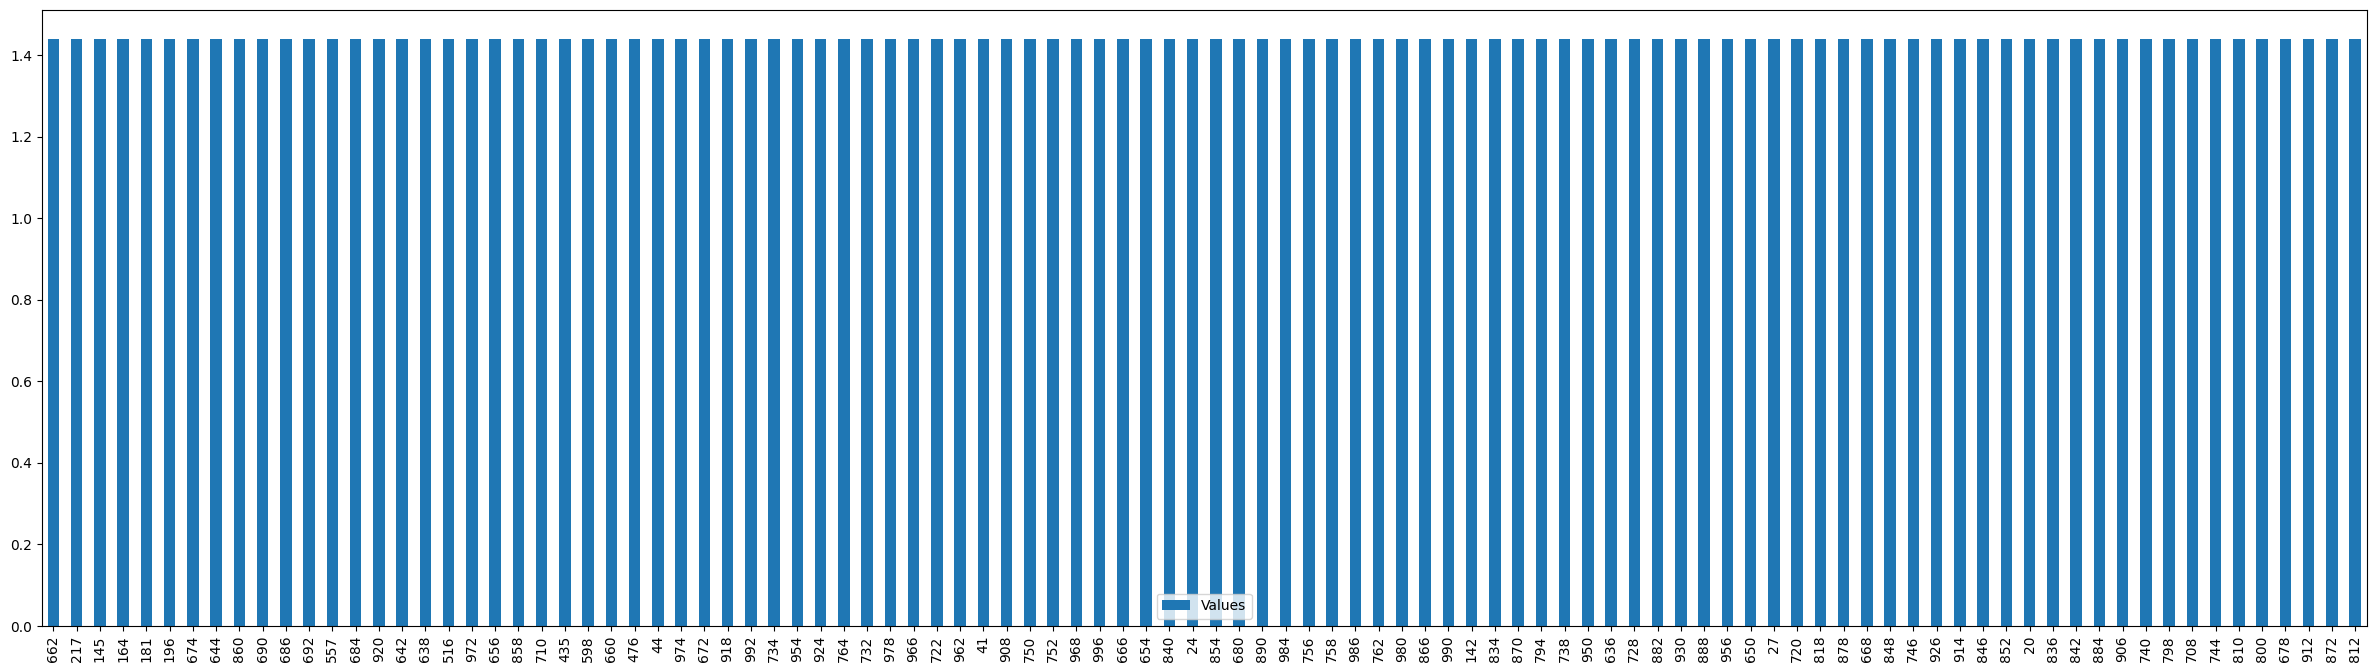

In [ ]:
mutual_info=mutual_info[:100]
mutual_info.plot.bar(figsize=(30, 8))

In [ ]:
fsop3 = top_200_values

In [ ]:
fsop3

['v_/ports#RR-01/metrics/network-incoming-packets',
 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/v4-protocol-stats/in-octets',
 'n_/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-octets',
 'n_/devices/modules/openconfig-interfaces/interfaces/interface/subinterfaces/subinterface/state/counters/in-octets',
 'n_/devices/modules/ietf-interfaces/interfaces-state/interface/statistics/in-octets',
 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/in-octets',
 'v_/ports#TR-01/metrics/network-incoming-packets',
 'v_/ports#IntGW-01/metrics/network-outgoing-packets',
 'v_/ports#link-tr-intgw-a-3-y/metrics/network-outgoing-packets',
 'v_/ports#TR-02/metrics/network-outgoing-bytes',
 'v_/ports#TR-02/metrics/network-incoming-packets',
 'v_/ports#TR-02/metrics/network-outgoing-packets',
 'v_/devices#TR-01/metrics/cpu',
 'v_/ports#TR-02/metrics/network-incoming-bytes',
 'v_/ports#link-tr-intgw-b-3-x/metrics/network-

###Combined features

In [ ]:
fsop2=list(fsop2)
print(len(fsop1))
print(len(fsop2))
print(len(fsop3))
print(len(fsop1)+len(fsop2)+len(fsop3))

200
200
200
600


In [ ]:
fcombined=set()
for i in fsop1:
  fcombined.add(i)
for i in fsop2:
  fcombined.add(i)
for i in fsop3:
  fcombined.add(i)
fcombined=list(fcombined)
len(fcombined)

402

##Boruta feature selection

In [ ]:
!pip install boruta

In [ ]:
traindata.shape

(9796, 997)

In [ ]:
traindata2=traindata[fcombined]
traindata2.shape

(9796, 402)

In [ ]:
X=traindata2.values
Y=traintarget.values

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=5)

trans = BorutaPy(clf, random_state=42, verbose=2)
sel = trans.fit_transform(X, Y)

In [ ]:
selected_features = traindata2.columns[trans.support_]
print("Selected features:", selected_features)
print("Feature rankings:", trans.ranking_)

In [ ]:
file_path = '/content/selected_features_larger.txt'  # The desired path for the output file

# Open the file in write model
with open(file_path, 'w') as file:
    # Write each item to a new line
    for item in selected_features:
        file.write(str(item)+',')

In [ ]:
traindata3=traindata2[selected_features]

In [ ]:
traindata3.shape

##Outlier detection

In [ ]:
X_train=traindata3.values
Y_train=traintarget.values

In [ ]:
from sklearn.ensemble import IsolationForest
IF_classifier = IsolationForest(n_estimators  = 2_000,
                                contamination = 0.05,
                                random_state  = 42)

y_pred_IF = IF_classifier.fit_predict(X)
X_train_filtered, y_train_filtered = X_train[(y_pred_IF == 1)], Y_train[(y_pred_IF == 1)]
rows_after_filtering = X_train_filtered.shape[0]

In [ ]:
X_train.shape

In [ ]:
X_train_filtered.shape

In [ ]:
X_train_filtered

In [ ]:
# Step 1: Read the text file containing important features
with open('/content/selected_features_larger.txt', 'r') as file:
    important_features = [line.strip() for line in file]

# Step 2: Convert the list of important features into a set for faster lookup
important_features_set = set(important_features)

selected_columns = [col for col in X_train.columns if col in important_features_set]
filtered_data = X_train[selected_columns]

# Step 5: Save the modified dataset if needed
filtered_data.to_csv('filtered_dataset.csv', index=False)


##Handling imbalance data

In [ ]:
import numpy as np

# Calculate value counts
unique_values, value_counts = np.unique(y_train_filtered, return_counts=True)

# Print the value counts
for value, count in zip(unique_values, value_counts):
    print(f"Value {value}: Count {count}")


In [ ]:
from imblearn.combine import SMOTETomek
os=SMOTETomek()
X_train_ns,y_train_ns=os.fit_resample(X_train_filtered,y_train_filtered)

In [ ]:
X_train_ns.shape

In [ ]:
import numpy as np

# Calculate value counts
unique_values, value_counts = np.unique(y_train_ns, return_counts=True)

# Print the value counts
for value, count in zip(unique_values, value_counts):
    print(f"Value {value}: Count {count}")
